In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# validation 약관조항, 유불리 출력

import os
import glob
import json
import csv

class FindID :
    def __init__(self, path):
        self.path = path       #폴더들 주소
        self.json_list = []    #폴더들에서 json파일만 뽑아서 저장
        self.file_dic = {}     #모든 폴더와 폴더경로안의 파일들을 정리해놓은 사전.
        self.output1_dic = {}   #마지막 출력을 위해서 key->json파일이름, value->각각의ID를 저장시킬거임.
        self.output2_dic = {}   #마지막 출력을 위해서 key->json파일이름, value->각각의ID를 저장시킬거임. 

        self.add_files(path)   #file_dic사전만들기 시작
        self.creat_output1()    #출력할 내용을 정리하는 output_dic에 값을 넣어주는 함수.
        self.creat_output2()    #출력할 내용을 정리하는 output_dic에 값을 넣어주는 함수.

    def my_list(self, file_path):
        '''
            폴더안의 파일들을 리스트로 정리해서 return 해준다.
            glob함수는 폴더경로를 이용해 그안에 있는 모든 파일을 출력해준다.
        '''
        file_list = glob.glob(file_path + "/*")
        return file_list
    
    def check_json(self, file_name):
        '''
            만약 json파일까지 도달했다면(파일이름이 .json으로 끝난다면), 그 json파일은 json_list에 저장하고,
            아직 폴더가 남았다면, 다시 add_files()를 호출해서 file_dic사전에 추가정리. 
        '''
        if(self.file_dic[file_name][0].endswith(".json")):
            self.json_list.extend(self.file_dic[file_name])
        else:
            for name in self.file_dic[file_name]:
                self.add_files(name)

    def add_files(self, file_path):
        '''
            main함수
            my_list로 폴더안의 파일리스트를 받아서 file_dic에 저장.
            그리고 json 파일까지 도달했는지 체크한다.
        '''
        self.file_dic[file_path] = self.my_list(file_path)
        self.check_json(file_path)

    def creat_output1(self):
        '''
            이제 다 뽑아낸 json_list(시리얼넘버)들로 각각의 json파일안의 'clauseArticle'의 value값을 뽑아,
            output_dic사전에 저장한다. 
        '''
        for filename in self.json_list:
            with open(filename, 'r',) as file:
                json_data = json.load(file)
            self.output1_dic[filename] = json_data["clauseArticle"]

    def creat_output2(self):
        '''
            이제 다 뽑아낸 json_list(시리얼넘버)들로 각각의 json파일안의 'dvAntageous'의 value값을 뽑아,
            output_dic사전에 저장한다. 
        '''
        for filename in self.json_list:
            with open(filename, 'r',) as file:
                json_data = json.load(file)
            self.output2_dic[filename] = json_data["dvAntageous"]

if __name__ == "__main__":
    folder_name = input("input folder address : ")
    
    #파이썬 파일과 폴더가 동일할 때는 이 코드를 씀.
    #folder_name = "./" + folder_name

    folder = FindID(folder_name)

    '''
        output_dic(키:json파일경로, 밸류:값)사전에 있는 값을 csv에 옯겨적는다.
        파일이름은 키값인 json파일경로에서 뽑아냈다. -> key.split("/")[-1][:-8]
    '''
    with open('df1.csv','w', newline='') as csvfile :
        writer = csv.writer(csvfile)

        writer.writerow(['File Name', 'clauseArticle', 'dvAntageous'])
        for key, val1 in folder.output1_dic.items():
          for key, val2 in folder.output2_dic.items():
            writer.writerow([key.split("/")[-1][:-8], val1, val2])

input folder address : /content/drive/MyDrive/01.유리_validation


In [3]:
# 불리 데이터 불러오기

import os
import glob
import json
import csv

class FindID :
    def __init__(self, path):
        self.path = path       #폴더들 주소
        self.json_list = []    #폴더들에서 json파일만 뽑아서 저장
        self.file_dic = {}     #모든 폴더와 폴더경로안의 파일들을 정리해놓은 사전.
        self.output1_dic = {}   #마지막 출력을 위해서 key->json파일이름, value->각각의ID를 저장시킬거임.
        self.output2_dic = {}   #마지막 출력을 위해서 key->json파일이름, value->각각의ID를 저장시킬거임. 

        self.add_files(path)   #file_dic사전만들기 시작
        self.creat_output1()    #출력할 내용을 정리하는 output_dic에 값을 넣어주는 함수.
        self.creat_output2()    #출력할 내용을 정리하는 output_dic에 값을 넣어주는 함수.

    def my_list(self, file_path):
        '''
            폴더안의 파일들을 리스트로 정리해서 return 해준다.
            glob함수는 폴더경로를 이용해 그안에 있는 모든 파일을 출력해준다.
        '''
        file_list = glob.glob(file_path + "/*")
        return file_list
    
    def check_json(self, file_name):
        '''
            만약 json파일까지 도달했다면(파일이름이 .json으로 끝난다면), 그 json파일은 json_list에 저장하고,
            아직 폴더가 남았다면, 다시 add_files()를 호출해서 file_dic사전에 추가정리. 
        '''
        if(self.file_dic[file_name][0].endswith(".json")):
            self.json_list.extend(self.file_dic[file_name])
        else:
            for name in self.file_dic[file_name]:
                self.add_files(name)

    def add_files(self, file_path):
        '''
            main함수
            my_list로 폴더안의 파일리스트를 받아서 file_dic에 저장.
            그리고 json 파일까지 도달했는지 체크한다.
        '''
        self.file_dic[file_path] = self.my_list(file_path)
        self.check_json(file_path)

    def creat_output1(self):
        '''
            이제 다 뽑아낸 json_list(시리얼넘버)들로 각각의 json파일안의 'clauseArticle'의 value값을 뽑아,
            output_dic사전에 저장한다. 
        '''
        for filename in self.json_list:
            with open(filename, 'r',) as file:
                json_data = json.load(file)
            self.output1_dic[filename] = json_data["clauseArticle"]

    def creat_output2(self):
        '''
            이제 다 뽑아낸 json_list(시리얼넘버)들로 각각의 json파일안의 'dvAntageous'의 value값을 뽑아,
            output_dic사전에 저장한다. 
        '''
        for filename in self.json_list:
            with open(filename, 'r',) as file:
                json_data = json.load(file)
            self.output2_dic[filename] = json_data["dvAntageous"]

if __name__ == "__main__":
    folder_name = input("input folder address : ")
    
    #파이썬 파일과 폴더가 동일할 때는 이 코드를 씀.
    #folder_name = "./" + folder_name

    folder = FindID(folder_name)

    '''
        output_dic(키:json파일경로, 밸류:값)사전에 있는 값을 csv에 옯겨적는다.
        파일이름은 키값인 json파일경로에서 뽑아냈다. -> key.split("/")[-1][:-8]
    '''
    with open('df2.csv','w', newline='') as csvfile :
        writer = csv.writer(csvfile)

        writer.writerow(['File Name', 'clauseArticle', 'dvAntageous'])
        for key, val1 in folder.output1_dic.items():
          for key, val2 in folder.output2_dic.items():
            writer.writerow([key.split("/")[-1][:-8], val1, val2])

input folder address : /content/drive/MyDrive/02.불리


In [4]:
# train 약관조항, 유불리 출력

import os
import glob
import json
import csv

class FindID :
    def __init__(self, path):
        self.path = path       #폴더들 주소
        self.json_list = []    #폴더들에서 json파일만 뽑아서 저장
        self.file_dic = {}     #모든 폴더와 폴더경로안의 파일들을 정리해놓은 사전.
        self.output1_dic = {}   #마지막 출력을 위해서 key->json파일이름, value->각각의ID를 저장시킬거임.
        self.output2_dic = {}   #마지막 출력을 위해서 key->json파일이름, value->각각의ID를 저장시킬거임. 

        self.add_files(path)   #file_dic사전만들기 시작
        self.creat_output1()    #출력할 내용을 정리하는 output_dic에 값을 넣어주는 함수.
        self.creat_output2()    #출력할 내용을 정리하는 output_dic에 값을 넣어주는 함수.

    def my_list(self, file_path):
        '''
            폴더안의 파일들을 리스트로 정리해서 return 해준다.
            glob함수는 폴더경로를 이용해 그안에 있는 모든 파일을 출력해준다.
        '''
        file_list = glob.glob(file_path + "/*")
        return file_list
    
    def check_json(self, file_name):
        '''
            만약 json파일까지 도달했다면(파일이름이 .json으로 끝난다면), 그 json파일은 json_list에 저장하고,
            아직 폴더가 남았다면, 다시 add_files()를 호출해서 file_dic사전에 추가정리. 
        '''
        if(self.file_dic[file_name][0].endswith(".json")):
            self.json_list.extend(self.file_dic[file_name])
        else:
            for name in self.file_dic[file_name]:
                self.add_files(name)

    def add_files(self, file_path):
        '''
            main함수
            my_list로 폴더안의 파일리스트를 받아서 file_dic에 저장.
            그리고 json 파일까지 도달했는지 체크한다.
        '''
        self.file_dic[file_path] = self.my_list(file_path)
        self.check_json(file_path)

    def creat_output1(self):
        '''
            이제 다 뽑아낸 json_list(시리얼넘버)들로 각각의 json파일안의 'clauseArticle'의 value값을 뽑아,
            output_dic사전에 저장한다. 
        '''
        for filename in self.json_list:
            with open(filename, 'r',) as file:
                json_data = json.load(file)
            self.output1_dic[filename] = json_data["clauseArticle"]

    def creat_output2(self):
        '''
            이제 다 뽑아낸 json_list(시리얼넘버)들로 각각의 json파일안의 'dvAntageous'의 value값을 뽑아,
            output_dic사전에 저장한다. 
        '''
        for filename in self.json_list:
            with open(filename, 'r',) as file:
                json_data = json.load(file)
            self.output2_dic[filename] = json_data["dvAntageous"]

if __name__ == "__main__":
    folder_name = input("input folder address : ")
    
    #파이썬 파일과 폴더가 동일할 때는 이 코드를 씀.
    #folder_name = "./" + folder_name

    folder = FindID(folder_name)

    '''
        output_dic(키:json파일경로, 밸류:값)사전에 있는 값을 csv에 옯겨적는다.
        파일이름은 키값인 json파일경로에서 뽑아냈다. -> key.split("/")[-1][:-8]
    '''
    with open('df3.csv','w', newline='') as csvfile :
        writer = csv.writer(csvfile)

        writer.writerow(['File Name', 'clauseArticle', 'dvAntageous'])
        for key, val1 in folder.output1_dic.items():
          for key, val2 in folder.output2_dic.items():
            writer.writerow([key.split("/")[-1][:-8], val1, val2])

input folder address : /content/drive/MyDrive/01.유리_train


In [5]:
import pandas as pd

df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')

In [6]:
# 데이터불균형으로 validation data -> 불리조항(0)으로 변경
df1['dvAntageous'] = 0
df1.tail()

,File Name,clauseArticle,dvAntageous
9211,190_질병보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9212,193_자동차보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9213,199_자동차보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9214,208_질병보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9215,209_질병보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0


In [7]:
# 불리조항 0 / 유리조항 1
df2['dvAntageous'] = 0
df2.tail()

,File Name,clauseArticle,dvAntageous
0,001_생명보험_가,['(00000)\n제13조 (보험금 지급에 관한 세부규정)\n제3항 제12조(보험...,0
1,002_생명보험_가,['(00000)\n제13조 (보험금 지급에 관한 세부규정)\n제3항 제12조(보험...,0
2,001_생명보험_가,['제16조 (약관 변경)\n회사가 본 약관의 내용을 변경하고자 할 경우 변경사항을...,0
3,002_생명보험_가,['제16조 (약관 변경)\n회사가 본 약관의 내용을 변경하고자 할 경우 변경사항을...,0


In [8]:
df = pd.concat([df1,df2,df3], ignore_index = True)
df.head()

,File Name,clauseArticle,dvAntageous
0,001_상해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
1,006_손해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
2,009_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
3,012_생명보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
4,014_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0


In [9]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [22.9 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,307 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [8

In [10]:
from konlpy.tag import Mecab
tokenizer = Mecab()

In [11]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
df.head()

,File Name,clauseArticle,dvAntageous
0,001_상해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
1,006_손해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
2,009_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
3,012_생명보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
4,014_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0


In [13]:
df=df.rename(columns = {'File Name' : '보험종류'})
df.head()

,보험종류,clauseArticle,dvAntageous
0,001_상해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
1,006_손해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
2,009_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
3,012_생명보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
4,014_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0


In [14]:
# 중복여부 확인
df['보험종류'].nunique(), df['clauseArticle'].nunique()

(719, 705)

In [15]:
df.drop_duplicates(subset=['clauseArticle'], inplace=True) # clauseArticle 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 705


In [16]:
# null값 확인
print(df.isnull().values.any())

False


In [17]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)
print('훈련용 개수 :', len(train_data))
print('테스트용 개수 :', len(test_data))

훈련용 개수 : 564
테스트용 개수 : 141


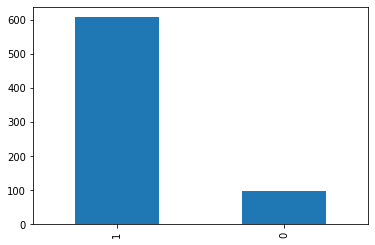

In [18]:
df['dvAntageous'].value_counts().plot(kind = 'bar')

In [19]:
print(train_data.groupby('dvAntageous').size().reset_index(name = 'count'))

   dvAntageous  count
0            0     72
1            1    492


In [20]:
# 한글과 공백을 제외하고 모두 제거
train_data['clauseArticle'] = train_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['clauseArticle'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

보험종류             0
clauseArticle    0
dvAntageous      0
dtype: int64


<ipython-input-20-e6fe363d0f1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['clauseArticle'] = train_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [21]:
# test 데이터도 전처리
test_data.drop_duplicates(subset = ['clauseArticle'], inplace=True) # 중복 제거
test_data['clauseArticle'] = test_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['clauseArticle'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 141


<ipython-input-21-1a7faf7cdbdf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['clauseArticle'] = test_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [22]:
mecab = Mecab()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
train_data['tokenized'] = train_data['clauseArticle'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [23]:
test_data['tokenized'] = test_data['clauseArticle'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [24]:
# 단어와 길이 분포 확인 (0=불리, 1=유리)
negative_words = np.hstack(train_data[train_data.dvAntageous == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.dvAntageous == 1]['tokenized'].values)

In [25]:
# 빈도수가 높은 상위 20개 단어들을 출력 (불리)
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('지급', 101), ('제조', 98), ('계약', 83), ('보험금', 81), ('보험', 74), ('할', 74), ('회사', 73), ('일', 73), ('경우', 71), ('청구', 58), ('계약자', 57), ('이내', 57), ('청약', 50), ('부터', 50), ('또는', 48), ('있', 45), ('때', 44), ('수', 44), ('여', 43), ('합니다', 42)]


In [26]:
# 빈도수가 높은 상위 20개 단어들을 출력 (유리)
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('계약', 654), ('일', 594), ('지급', 561), ('제조', 536), ('청약', 431), ('부터', 426), ('보험', 421), ('회사', 417), ('경우', 414), ('할', 397), ('또는', 379), ('이내', 361), ('보험금', 358), ('계약자', 349), ('날', 304), ('수', 289), ('진단', 282), ('철회', 282), ('습니다', 266), ('청구', 259)]


유리 평균 길이 : 46.00813008130081
불리 평균 길이 : 51.59722222222222


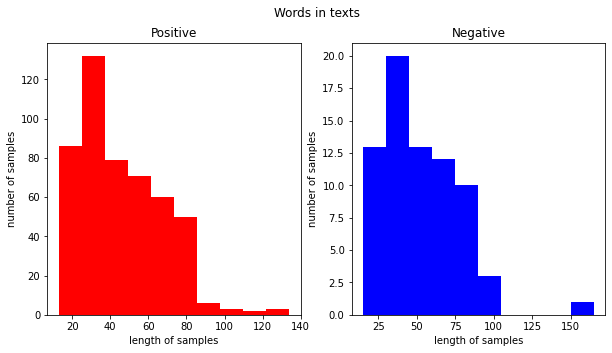

In [27]:
# 각각 길이 분포 확인
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['dvAntageous']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('유리 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['dvAntageous']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('불리 평균 길이 :', np.mean(text_len))
plt.show()

In [28]:
# 유리한 조항보다는 불리한 조항의 길이가 조금 더 길다.
X_train = train_data['tokenized'].values
y_train = train_data['dvAntageous'].values
X_test= test_data['tokenized'].values
y_test = test_data['dvAntageous'].values

In [29]:
# 정수 인코딩 : 단어 집합이 생성 -> 각 단어에 고유한 정수 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [30]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 805
등장 빈도가 1번 이하인 희귀 단어의 수: 195
단어 집합에서 희귀 단어의 비율: 24.22360248447205
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.740009866798224


In [31]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 612


In [32]:
# 토크나이저의 인자로 넘겨주고, 텍스트 시퀀스를 정수 시퀀스로 변환. 정수 인코딩 과정에서 이보다 큰 숫자가 부여된 단어들은 OOV로 변환.
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [33]:
print(X_train[:3])
print(X_test[:3])

[[5, 9, 18, 15, 9, 18, 26, 7, 9, 18, 67, 16, 10, 133, 3, 14, 61, 40, 15, 51, 239, 188, 106, 40, 88, 366, 157, 296, 53, 165, 25, 6, 297, 258, 237, 160, 210, 259, 310, 181, 298, 34, 166, 96, 189, 25, 4, 24, 43, 15, 119, 40, 39, 240, 247, 34, 61, 2, 9, 18, 8, 7, 9, 18, 67, 16, 10, 133, 3, 14, 93, 240, 247, 7, 34, 367, 368, 19, 29, 299, 268, 106, 8, 7, 40, 88, 52, 27, 137], [5, 12, 4, 56, 107, 70, 5, 12, 4, 50, 87, 41, 44, 35, 4, 75, 89, 58, 3, 13, 62, 20, 42, 3, 10, 3, 14, 42, 23, 29, 8, 89, 58, 3, 13, 62, 20, 42, 3, 10, 3, 23, 16, 94, 20, 167, 25, 168, 123, 52, 27, 141, 23, 97, 44, 35, 4, 75, 34, 59, 24, 43, 44, 35, 169, 44, 35, 170, 110, 158, 34, 64, 8, 28, 138], [5, 12, 4, 56, 107, 70, 5, 12, 4, 50, 87, 41, 44, 35, 4, 75, 89, 58, 3, 13, 62, 20, 42, 3, 10, 3, 14, 42, 23, 29, 8, 89, 58, 3, 13, 62, 20, 42, 3, 10, 3, 23, 16, 94, 20, 167, 25, 168, 123, 52, 27, 141, 23, 97, 44, 35, 4, 75, 34, 59, 24, 43, 44, 35, 169, 44, 35, 170, 110, 158, 34, 64, 8, 28, 138]]
[[104, 112, 76, 2, 15, 13, 33, 

최대 길이 : 165
평균 길이 : 46.72163120567376


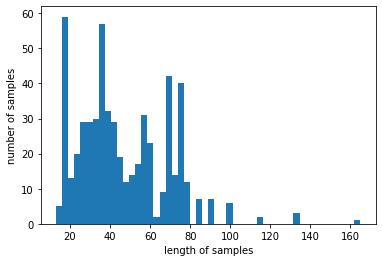

In [34]:
print('최대 길이 :',max(len(clauseArticle) for clauseArticle in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(clauseArticle) for clauseArticle in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [35]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [36]:
# 최대 길이가 165이므로 만약 140으로 패딩할 경우, 몇 개의 샘플들을 온전히 보전할 수 있는지 확인
max_len = 140
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 140 이하인 샘플의 비율: 99.822695035461


In [37]:
# 99.82%가 140이하의 길이 -> 훈련용 길이 140으로 패딩
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [38]:
# GRU로 유리/불리 조항 분류하기
# 하이퍼파라미터 : 임베딩 벡터의 차원 100, 은닉상태의 크기 128, 배치크기 64, 에포크 15
# 모델 : 다 대 일 구조의 LSTM 사용. -> 이진 분류 문제를 수행하는 모델. 
# 이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 시그모이드 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용.

from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 검증데이터 손실이 증가하면 과적합징후로서, 4회 증가하면 정해진 에포크 미도달이어도 학습조기종료
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # 검증데이터의 정확도가 이전보다 좋아질 경우에만 저장

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) # 20%는 검증데이터로 분리 사용

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 0.5357 - acc: 0.8160
Epoch 1: val_acc improved from -inf to 0.84071, saving model to best_model.h5
8/8 [==============================] - 4s 230ms/step - loss: 0.5357 - acc: 0.8160 - val_loss: 0.4787 - val_acc: 0.8407
Epoch 2/15
8/8 [==============================] - ETA: 0s - loss: 0.3762 - acc: 0.8803
Epoch 2: val_acc did not improve from 0.84071
8/8 [==============================] - 2s 217ms/step - loss: 0.3762 - acc: 0.8803 - val_loss: 0.5332 - val_acc: 0.8407
Epoch 3/15
8/8 [==============================] - ETA: 0s - loss: 0.3728 - acc: 0.8803
Epoch 3: val_acc did not improve from 0.84071
8/8 [==============================] - 2s 180ms/step - loss: 0.3728 - acc: 0.8803 - val_loss: 0.6924 - val_acc: 0.8407
Epoch 4/15
8/8 [==============================] - ETA: 0s - loss: 0.3533 - acc: 0.8803
Epoch 4: val_acc did not improve from 0.84071
8/8 [==============================] - 1s 174ms/step - loss: 0.3533 - acc: 0.88

In [39]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

5/5 [==============================] - 0s 19ms/step - loss: 0.4870 - acc: 0.8227

 테스트 정확도: 0.8227


In [40]:
# 예측해보기
# 학습하기 전 전처리를 동일하게 적용 : 정규 표현식을 통한 한국어 외 문자 제거 -> 토큰화 -> 불용어 제거 -> 정수 인코딩 -> 패딩 순서
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 유리한 조항입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 불리한 조항입니다.".format((1 - score) * 100))

In [41]:
sentiment_predict('피보험자가 병원을 옮긴 경우에도 계속하여 입원한 것으로 볼 수 있다')

1/1 [==============================] - 1s 599ms/step
71.47% 확률로 유리한 조항입니다.


In [42]:
sentiment_predict('보험료는 돌려받을 수 있나요')

1/1 [==============================] - 0s 17ms/step
70.52% 확률로 유리한 조항입니다.


In [43]:
sentiment_predict('가지급금은 아무나 받을 수 있나요')

1/1 [==============================] - 0s 18ms/step
71.59% 확률로 유리한 조항입니다.


In [44]:
sentiment_predict('수익자가 변경되면 알려야 하나요')

1/1 [==============================] - 0s 17ms/step
68.33% 확률로 유리한 조항입니다.
